In [15]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

OUTPUT_DIR = Path("../output").resolve()
FIGURES_DIR = OUTPUT_DIR / "figures"
CONSOMMATIONS_ENRICHIES_PARQUET_PATH = OUTPUT_DIR / "consommations_enrichies"
CONSOMMATIONS_ENRICHIES_CSV_PATH = OUTPUT_DIR / "consommations_enrichies.csv"

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [2]:
df = pd.read_parquet(CONSOMMATIONS_ENRICHIES_PARQUET_PATH.as_posix())
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date'])
df['date_debut'] = pd.to_datetime(df['date'])
df['date_fin'] = pd.to_datetime(df['date'])
df['type_energie'] = df['type_energie'].astype("str")

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492584 entries, 0 to 7492583
Data columns (total 37 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   batiment_id                    object        
 1   timestamp                      datetime64[ns]
 2   consommation                   float64       
 3   unite                          object        
 4   hour                           int32         
 5   year                           int32         
 6   month                          int32         
 7   date                           datetime64[ns]
 8   nom                            object        
 9   type                           object        
 10  commune                        object        
 11  surface_m2                     int32         
 12  annee_construction             int32         
 13  classe_energetique             object        
 14  nb_occupants_moyen             int32         
 15  intensite_energ

,batiment_id,timestamp,consommation,unite,hour,year,month,date,nom,type,...,consommation_par_occupant,consommation_par_m2,consommation_journaliere,cout_journalier,cout_mensuel,cout_annuel,consommation_annuelle,IPE,consommation_moyenne_par_type,ecart_conso_moyenne_type
0,BAT0056,2024-01-13 08:00:00,5.23,m3,8,2024,1,2024-01-13,Ecole Nantes 56,ecole,...,0.038741,0.003350,2.573913,9.652174,27548.8875,315022.9875,84006.13,53.815586,7.617028,0.686620
1,BAT0001,2024-01-13 04:00:00,0.22,m3,4,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.000978,0.000114,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.028883
2,BAT0056,2024-01-13 17:00:00,3.42,m3,17,2024,1,2024-01-13,Ecole Nantes 56,ecole,...,0.025333,0.002191,2.573913,9.652174,27548.8875,315022.9875,84006.13,53.815586,7.617028,0.448994
3,BAT0001,2024-01-13 09:00:00,2.30,m3,9,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.010222,0.001194,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.301955
4,BAT0056,2024-01-13 19:00:00,3.68,m3,19,2024,1,2024-01-13,Ecole Nantes 56,ecole,...,0.027259,0.002357,2.573913,9.652174,27548.8875,315022.9875,84006.13,53.815586,7.617028,0.483128
5,BAT0001,2024-01-13 10:00:00,3.81,m3,10,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.016933,0.001978,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.500195
6,BAT0057,2024-01-13 07:00:00,0.82,m3,7,2024,1,2024-01-13,Mairie Nantes 57,mairie,...,0.023429,0.000728,0.961304,3.604891,9985.0500,115972.2750,30925.94,27.465311,2.727374,0.300656
7,BAT0001,2024-01-13 13:00:00,2.68,m3,13,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.011911,0.001391,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.351843
8,BAT0057,2024-01-13 11:00:00,1.36,m3,11,2024,1,2024-01-13,Mairie Nantes 57,mairie,...,0.038857,0.001208,0.961304,3.604891,9985.0500,115972.2750,30925.94,27.465311,2.727374,0.498648
9,BAT0002,2024-01-13 09:00:00,1.49,m3,9,2024,1,2024-01-13,Ecole Paris 2,ecole,...,0.003706,0.001289,0.859091,3.221591,9279.5625,104863.2375,27963.53,24.189905,7.617028,0.195614


### Partie 4 : Visualisation (3-4h)

**Competence evaluee : C2.4 - Presenter des donnees analysees de facon intelligible**

#### Etape 4.1 : Graphiques Matplotlib
Produire les visualisations suivantes avec Matplotlib :

1. Evolution temporelle de la consommation totale par type d'energie (line plot)

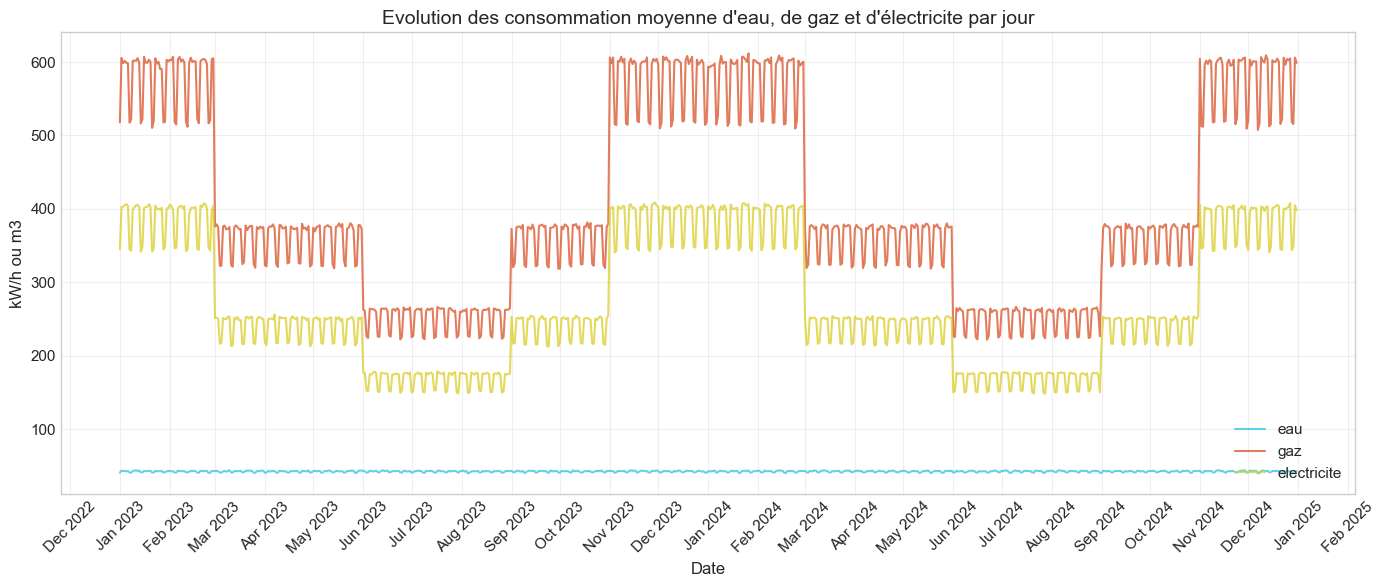

In [12]:
daily_pm = df.groupby(["date", "type_energie"])["consommation"].mean().unstack()

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(daily_pm.index, daily_pm["eau"], label="eau", color="#3CC5E7", linewidth=1.5, alpha=0.8)
ax.plot(daily_pm.index, daily_pm["gaz"], label="gaz", color="#DB5B34", linewidth=1.5, alpha=0.8)
ax.plot(daily_pm.index, daily_pm["electricite"], label="electricite", color="#DBD034", linewidth=1.5, alpha=0.8)

ax.set_xlabel("Date")
ax.set_ylabel("kW/h ou m3")
ax.set_title("Evolution des consommation moyenne d'eau, de gaz et d'électricite par jour")
ax.legend(loc='lower right')

# Format des dates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Grille
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/01_lineplot_conso_type_energie.png", dpi=300, bbox_inches='tight')
plt.show()

2. Distribution des consommations par type de batiment (boxplot)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


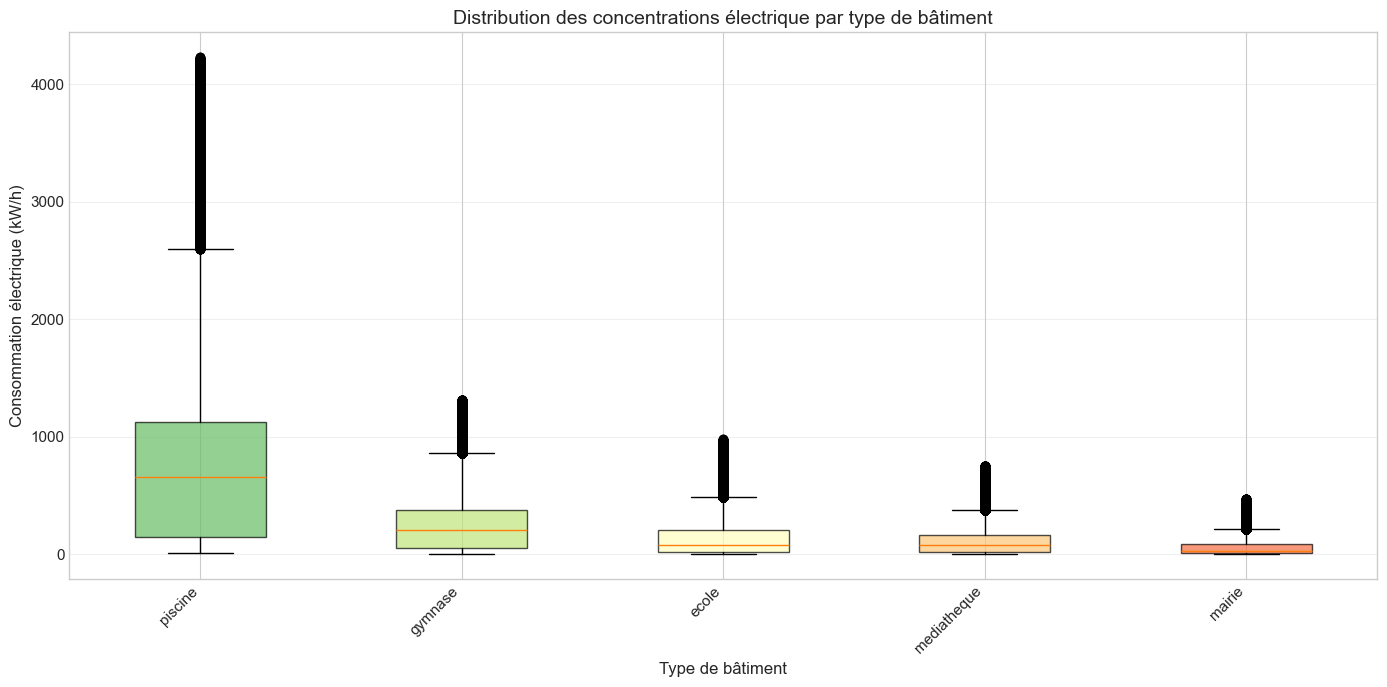

In [11]:
# Choix type energie
type_energie = "electricite"

type_batiment_order = df.groupby("type")["consommation"].mean().sort_values(ascending=False).index.tolist()

data_boxplot = [df[(df["type"] == type_batiment) & (df["type_energie"] == type_energie)]["consommation"].dropna().values for type_batiment in type_batiment_order]

fig, ax = plt.subplots(figsize=(14, 7))

bp = ax.boxplot(data_boxplot, labels=type_batiment_order, patch_artist=True)

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(type_batiment_order)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel("Type de bâtiment")
ax.set_ylabel("Consommation électrique (kW/h)")
ax.set_title("Distribution des concentrations électrique par type de bâtiment")
ax.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/02_boxplot_conso_type_batiment.png", dpi=300, bbox_inches='tight')
plt.show()

3. Heatmap consommation moyenne par heure et jour de semaine

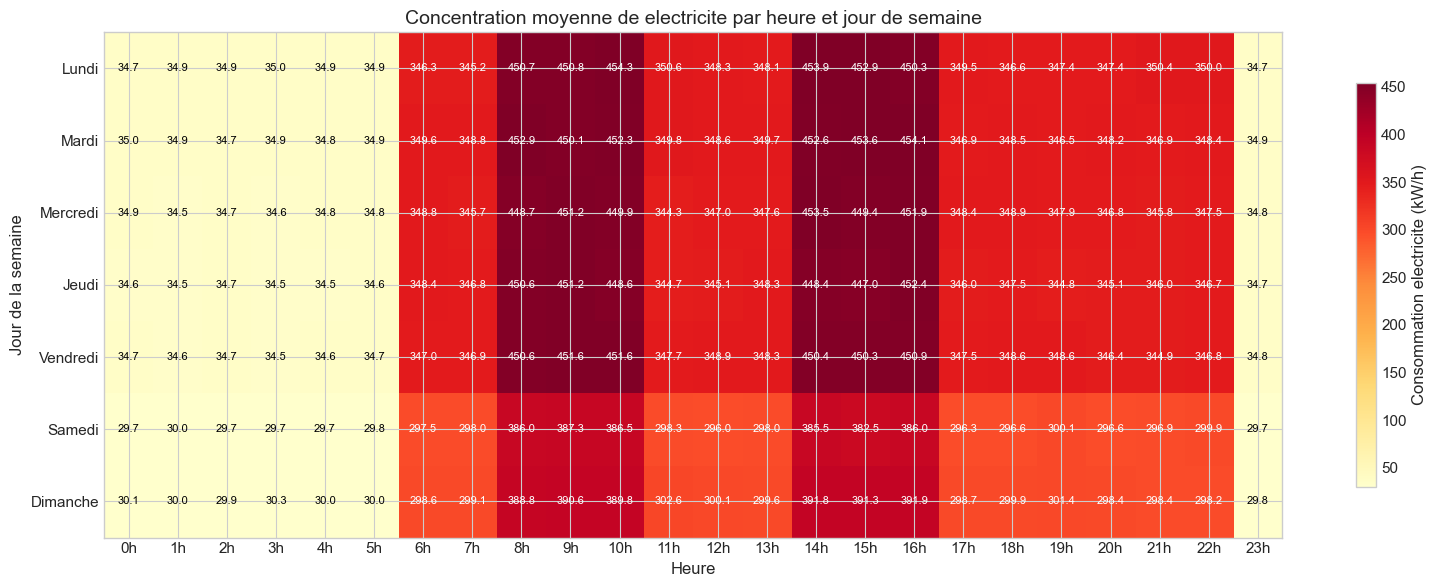

Figure sauvegardee: C:\Users\Administrateur\Documents\Damien_DESSAUX_ECF2\output\figures/03_heatmap_heure_jour.png


In [13]:
# Choisir un type d'énerige
type_energie = "electricite"
df_heatmap = df[df["type_energie"] == type_energie].copy()

# Pivot: jour de semaine x heure
pivot_heatmap = df_heatmap.pivot_table(
    values="consommation",
    index='day_of_week',
    columns='hour',
    aggfunc='mean'
)

# Noms des jours
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Figure
fig, ax = plt.subplots(figsize=(16, 6))

# Heatmap
im = ax.imshow(pivot_heatmap.values, cmap='YlOrRd', aspect='auto')

# Axes
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h}h' for h in range(24)])
ax.set_yticks(range(7))
ax.set_yticklabels(day_names)

# Colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
if type_energie == "eau":
    cbar.set_label(f"Consommation {type_energie} (m3)")
else:
    cbar.set_label(f"Consommation {type_energie} (kW/h)")

# Annotations
for i in range(len(day_names)):
    for j in range(24):
        value = pivot_heatmap.values[i, j]
        if not np.isnan(value):
            text_color = 'white' if value > pivot_heatmap.values.mean() else 'black'
            ax.text(j, i, f'{value:.1f}', ha='center', va='center', 
                   color=text_color, fontsize=8)

ax.set_xlabel('Heure')
ax.set_ylabel('Jour de la semaine')
ax.set_title(f'Concentration moyenne de {type_energie} par heure et jour de semaine')

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/03_heatmap_heure_jour.png", dpi=300, bbox_inches='tight')
plt.show()

4. Scatter plot temperature vs consommation de chauffage avec regression

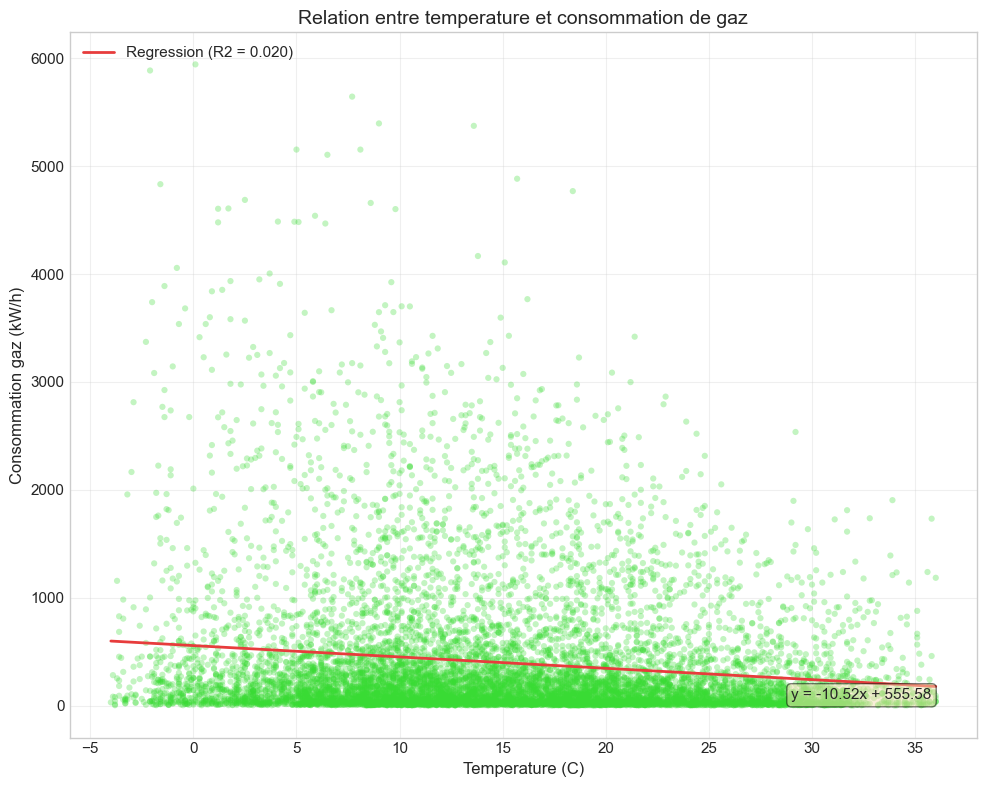


Correlation temperature/ozone: R = -0.142, R2 = 0.020
p-value: 1.88e-46


In [18]:
# Filtrer type énergie gaz
df_gaz = df[(df["type_energie"] == "gaz") & (df["temperature_c"].notna())].copy()

# Echantillonner si trop de points
if len(df_gaz) > 10_000:
    df_gaz_sample = df_gaz.sample(10_000, random_state=42)
else:
    df_gaz_sample = df_gaz

# Regression lineaire
x = df_gaz_sample["temperature_c"].values
y = df_gaz_sample["consommation"].values
mask = ~(np.isnan(x) | np.isnan(y))
x, y = x[mask], y[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept

# Figure
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter
scatter = ax.scatter(x, y, alpha=0.3, c="#39DB34", s=20, edgecolors="none")

# Ligne de regression
ax.plot(line_x, line_y, color="#E73C3C", linewidth=2, 
        label=f"Regression (R2 = {r_value**2:.3f})")

# Mise en forme
ax.set_xlabel("Temperature (C)")
ax.set_ylabel("Consommation gaz (kW/h)")
ax.set_title("Relation entre temperature et consommation de gaz")
ax.legend(loc="upper left")

# Ajouter equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"
ax.text(0.95, 0.05, equation, transform=ax.transAxes, fontsize=11,
        verticalalignment="bottom", horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/04_scatter_temp_gaz.png", dpi=300, bbox_inches="tight")
plt.show()

print(f"\nCorrelation temperature/gaz: R = {r_value:.3f}, R2 = {r_value**2:.3f}")
print(f"p-value: {p_value:.2e}")

Le test de significativité est bon p << 0.01.

La corrélation est faible |r| < 0.5.

Le sens de la corrélation est négative : Si la température augmente, la consommation de gaz diminue.

5. Comparaison consommation par classe energetique (bar chart)

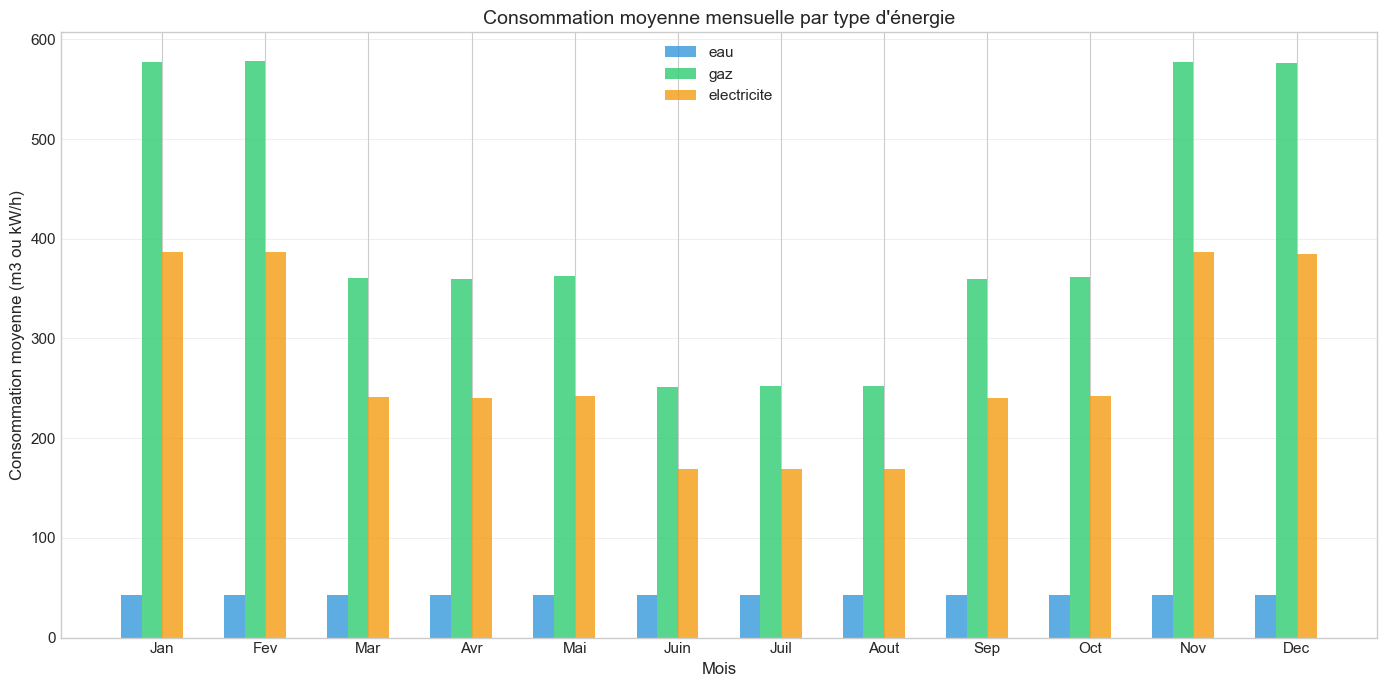

In [19]:
# Moyenne mensuelle par polluant
monthly_avg = df.groupby(["month", "type_energie"])["consommation_journaliere"].mean().unstack()

# Noms des mois
month_names = ["Jan", "Fev", "Mar", "Avr", "Mai", "Juin", "Juil", "Aout", "Sep", "Oct", "Nov", "Dec"]
monthly_avg.index = [month_names[i-1] for i in monthly_avg.index]

# Figure
fig, ax = plt.subplots(figsize=(14, 7))

# Bar chart groupe
x = np.arange(len(monthly_avg.index))
width = 0.2
colors = ["#3498DB", "#2ECC71", "#F39C12"]

for i, (pollutant, color) in enumerate(zip(["eau", "gaz", "electricite"], colors)):
    ax.bar(x + i*width, monthly_avg[pollutant], width, label=pollutant, color=color, alpha=0.8)

# Mise en forme
ax.set_xlabel("Mois")
ax.set_ylabel("Consommation moyenne (m3 ou kW/h)")
ax.set_title("Consommation moyenne mensuelle par type d'énergie")
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(monthly_avg.index)
ax.legend()
ax.grid(True, axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/05_barplot_mensuel.png", dpi=300, bbox_inches="tight")
plt.show()

Chaque graphique doit inclure : titre explicite, labels des axes avec unites, legende, annotations pertinentes.

**Livrables** :
- Notebook `09_visualisations_matplotlib.ipynb`
- 5 figures PNG (300 dpi) dans `output/figures/`